In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

## 의사결정나무

In [16]:
df = pd.read_csv('loan.csv')
df

,y,loan,mortgage,job,workyear,delinquency,period,inquire,transact,DTI
0,1,1300,70053,Other,7,2,121.83,0,14,48.20
1,1,1500,13500,Other,4,0,149.47,1,10,40.86
2,1,1500,78553,Other,10,1,107.81,2,25,39.60
3,0,1700,97800,Office,3,0,93.33,0,14,48.65
4,1,1700,30548,Other,9,0,101.47,1,8,37.11
...,...,...,...,...,...,...,...,...,...,...
6986,1,1800,48649,Other,5,2,77.10,1,17,36.44
6987,1,1800,28502,Other,11,0,88.77,0,8,36.88
6988,1,2000,32700,Other,3,2,216.93,1,12,36.83
6989,1,2000,82919,Sales,16,0,115.80,0,13,29.26


In [17]:
df.isnull().sum().sum()

0

In [18]:
df.groupby('job').mean()

,y,loan,mortgage,workyear,delinquency,period,inquire,transact,DTI
job,,,,,,,,,
Mgr,0.279412,18947.905462,80028.710084,9.172269,0.558824,173.443193,1.477941,22.580882,36.054979
Office,0.180909,18104.440000,67958.616364,8.399091,0.436364,177.157945,1.017273,21.200909,34.772091
Other,0.232263,17911.422167,62103.232616,9.272503,0.374162,172.503607,1.288740,19.263678,34.464261
ProfExe,0.204577,18883.011096,92253.009709,8.751040,0.417476,194.267684,1.044383,24.070042,33.676685
Sales,0.414384,16926.616438,76520.465753,8.065068,0.400685,178.711438,1.184932,22.595890,36.410377
Self,0.403226,23403.201613,85134.940860,7.793011,0.534946,172.465457,1.411290,22.432796,36.581478


In [19]:
df['job'] = df['job'].replace({'Office':0, 'ProfExe':1, 'Other':2, 'Mgr':3, 'Self':4, 'Sales':5})
df.groupby('job').mean()

,y,loan,mortgage,workyear,delinquency,period,inquire,transact,DTI
job,,,,,,,,,
0,0.180909,18104.440000,67958.616364,8.399091,0.436364,177.157945,1.017273,21.200909,34.772091
1,0.204577,18883.011096,92253.009709,8.751040,0.417476,194.267684,1.044383,24.070042,33.676685
2,0.232263,17911.422167,62103.232616,9.272503,0.374162,172.503607,1.288740,19.263678,34.464261
3,0.279412,18947.905462,80028.710084,9.172269,0.558824,173.443193,1.477941,22.580882,36.054979
4,0.403226,23403.201613,85134.940860,7.793011,0.534946,172.465457,1.411290,22.432796,36.581478
5,0.414384,16926.616438,76520.465753,8.065068,0.400685,178.711438,1.184932,22.595890,36.410377


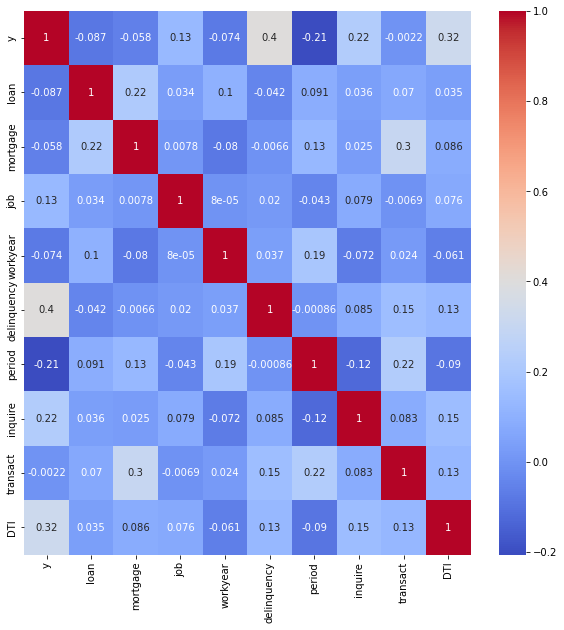

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)
plt.show()

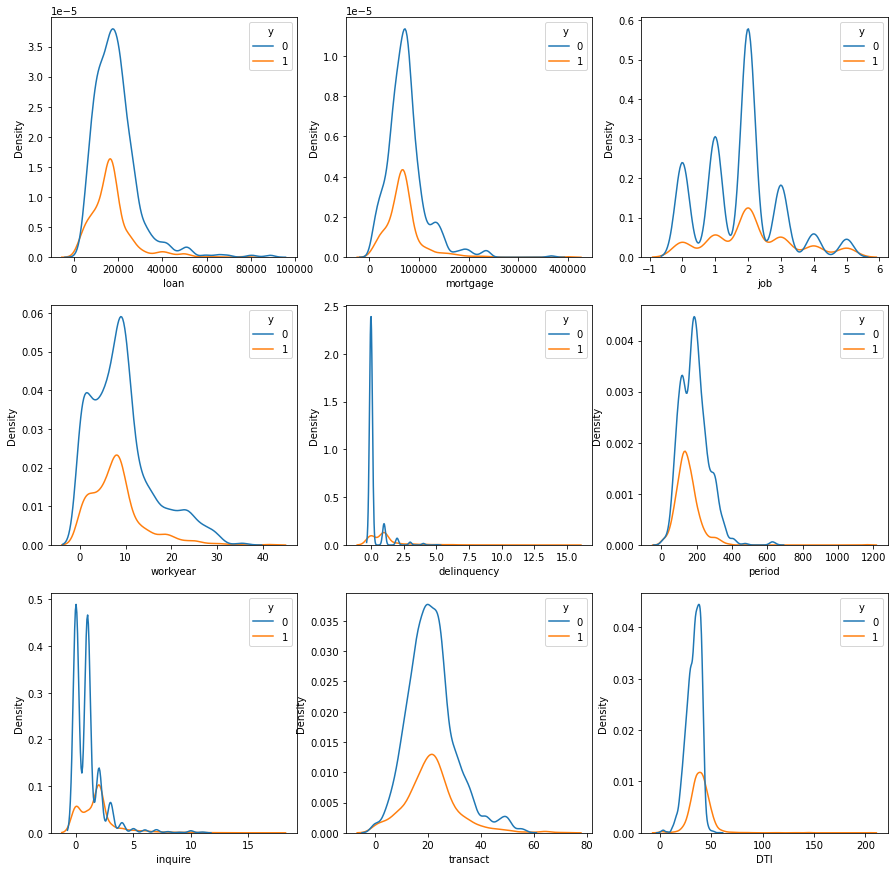

In [21]:
plt.figure(figsize=(15,15))
for i in range(0,9):
    plt.subplot(3,3,i+1)
    sns.kdeplot(data=df, x=df.columns[1:][i], hue="y")
plt.show()

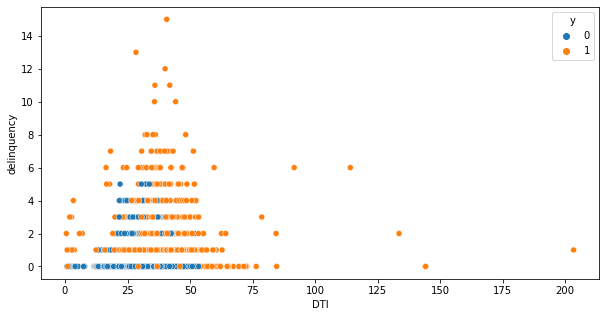

In [22]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='DTI', y='delinquency', hue='y')
plt.show()

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
X = df.drop(['y'], axis=1)
y = df['y']
xname = X.columns
yname = ['Normal','Bad']

In [25]:
c_tree?

default 값

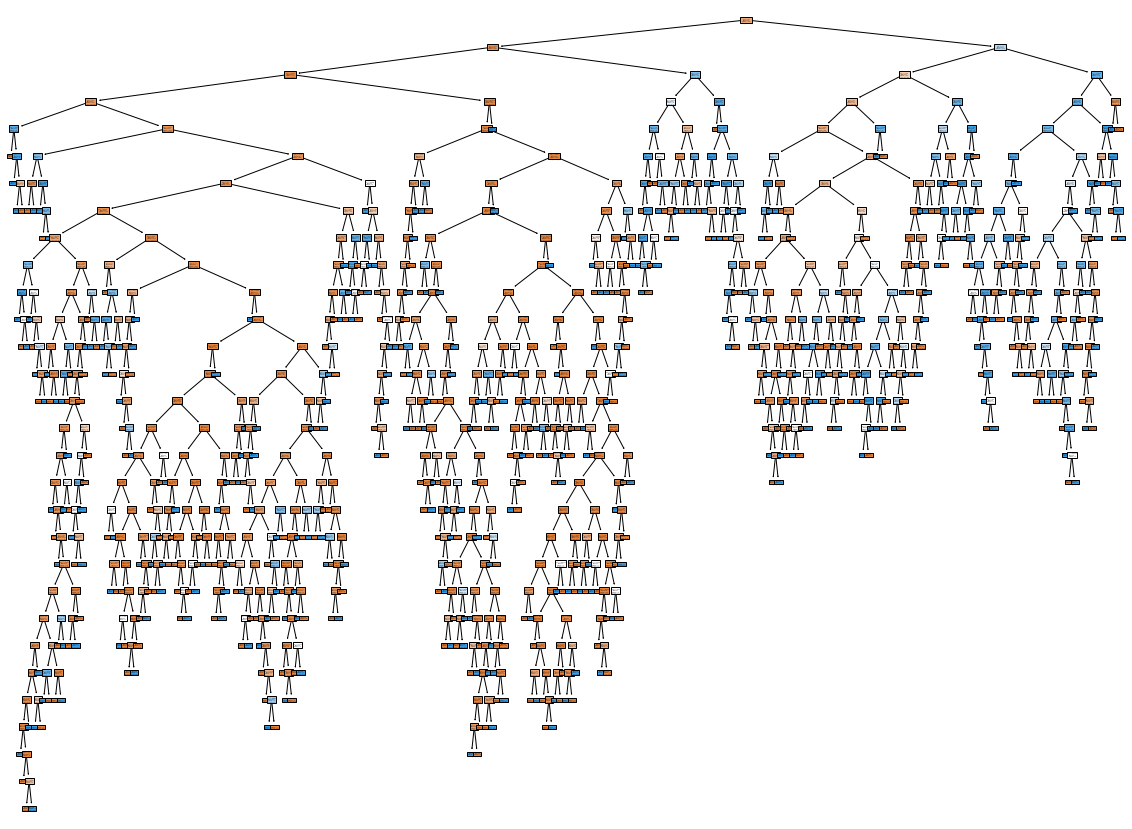

In [24]:
c_tree = DecisionTreeClassifier(random_state=0) 
c_tree.fit(X, y)
plt.figure(figsize=(20,15))
plot_tree(c_tree, filled=True) 
plt.show()

max_depth = None: 최대깊이 조정

min_samples_split = 2: 최소 노드크기 조정

min_impurity_decrease = 0.0: 최소 향상도 조정

Cost-complexity = 0.0: 비용복잡도 함수

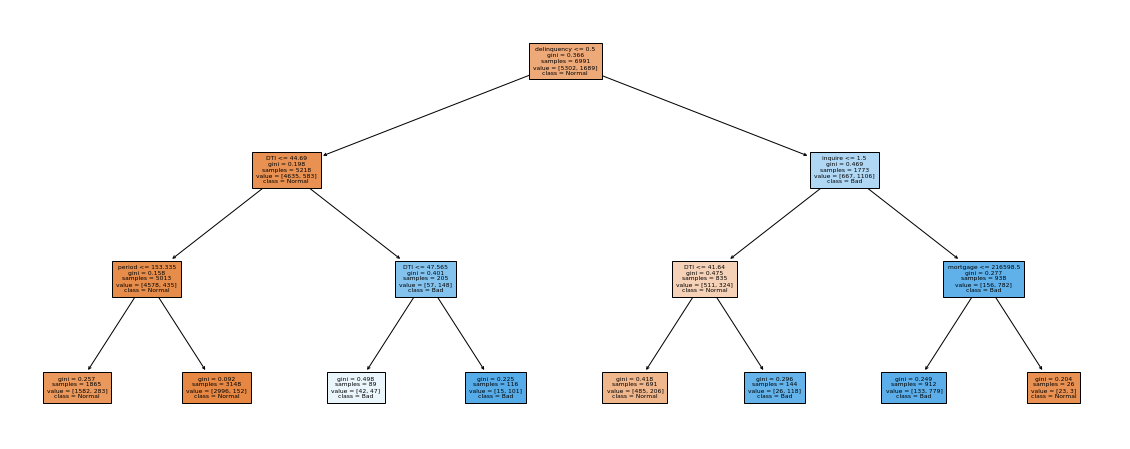

In [29]:
c_tree = DecisionTreeClassifier(max_depth=3,random_state=0) 
c_tree.fit(X, y)
plt.figure(figsize=(20,8))
plot_tree(c_tree, feature_names=xname, class_names=yname, filled=True, fontsize=6) 
plt.show()

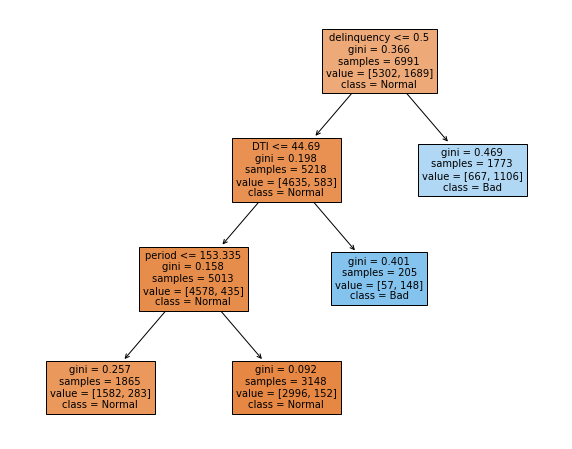

In [30]:
c_tree = DecisionTreeClassifier(min_samples_split=4000,random_state=0)
c_tree.fit(X, y)
plt.figure(figsize=(10,8))
plot_tree(c_tree, feature_names=xname, class_names=yname, filled=True, fontsize=10) 
plt.show()

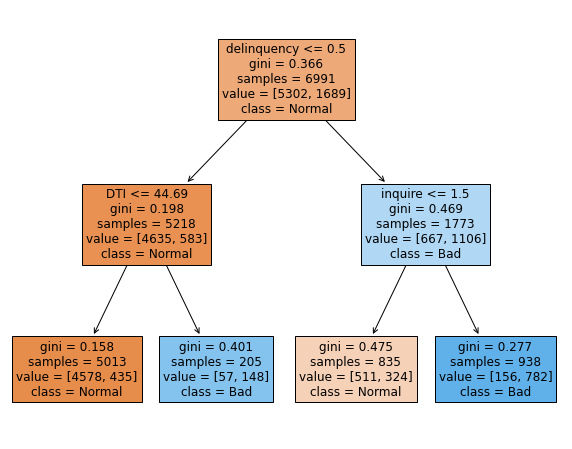

In [31]:
c_tree = DecisionTreeClassifier(min_impurity_decrease=0.01,random_state=0) 
c_tree.fit(X, y)
plt.figure(figsize=(10,8))
plot_tree(c_tree, feature_names=xname, class_names=yname, filled=True, fontsize=12) 
plt.show()

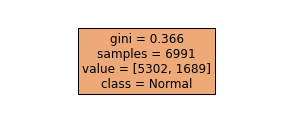

In [32]:
c_tree = DecisionTreeClassifier(ccp_alpha=0.5,random_state=0) 
c_tree.fit(X, y)
plt.figure(figsize=(5,2))
plot_tree(c_tree, feature_names=xname, class_names=yname, filled=True, fontsize=12) 
plt.show()

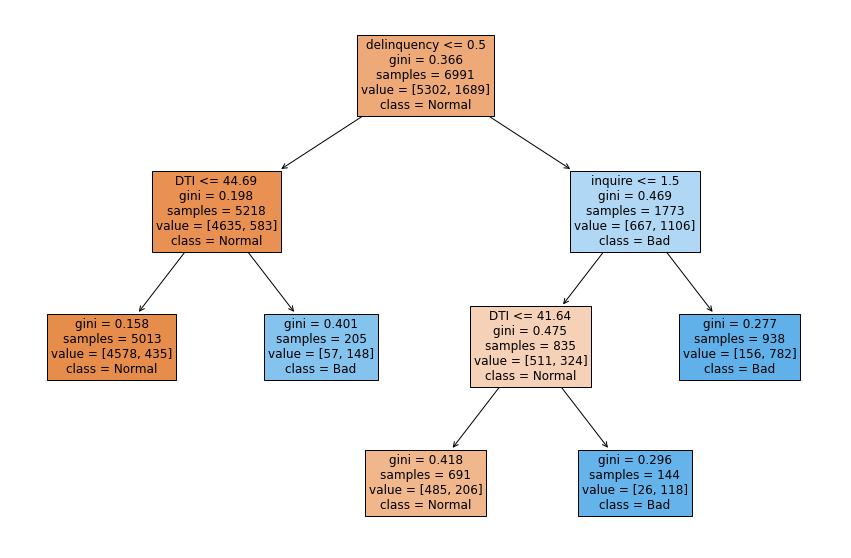

In [33]:
c_tree = DecisionTreeClassifier(ccp_alpha=0.005,random_state=0) 
c_tree.fit(X, y)
plt.figure(figsize=(15,10))
plot_tree(c_tree, feature_names=xname, class_names=yname, filled=True, fontsize=12) 
plt.show()

하이퍼파라미터 찾기

In [34]:
c_tree = DecisionTreeClassifier(random_state=0) 
path = c_tree.cost_complexity_pruning_path(X, y)
path = pd.DataFrame(path)
path

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000092,0.000554
2,0.000094,0.000837
3,0.000095,0.001122
4,0.000099,0.001420
...,...,...
245,0.003947,0.210085
246,0.009265,0.219351
247,0.022731,0.242082
248,0.025101,0.267183


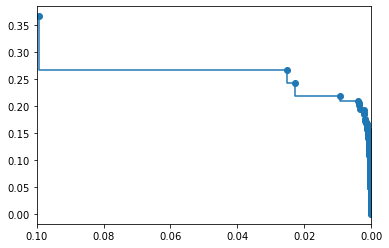

In [35]:
fig, ax = plt.subplots()
ax.plot(path.ccp_alphas, path.impurities, marker='o', drawstyle="steps-post")
ax.set_xlim(0.1, 0)  # decreasing order
plt.show()

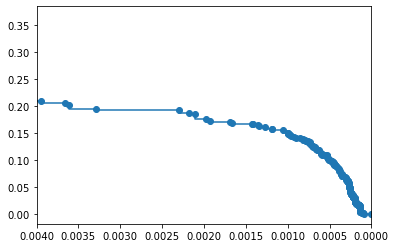

In [36]:
fig, ax = plt.subplots()
ax.plot(path.ccp_alphas, path.impurities, marker='o', drawstyle="steps-post")
ax.set_xlim(0.004, 0)  # decreasing order
plt.show()

In [38]:
np.random.seed(0)
g_cv = GridSearchCV(DecisionTreeClassifier(random_state=0),
              param_grid={'ccp_alpha': np.arange(0.000, 0.005, 0.0001),
                          'min_impurity_decrease': np.arange(0,0.003,0.0005),
                          'min_samples_split': np.arange(800,1200,200)},
                    cv=10, n_jobs=-1)
g_cv.fit(X, y)

print('selected:',g_cv.best_params_)
print('score   :',g_cv.best_score_)

selected: {'ccp_alpha': 0.0, 'min_impurity_decrease': 0.001, 'min_samples_split': 1000}
score   : 0.7398759452278766


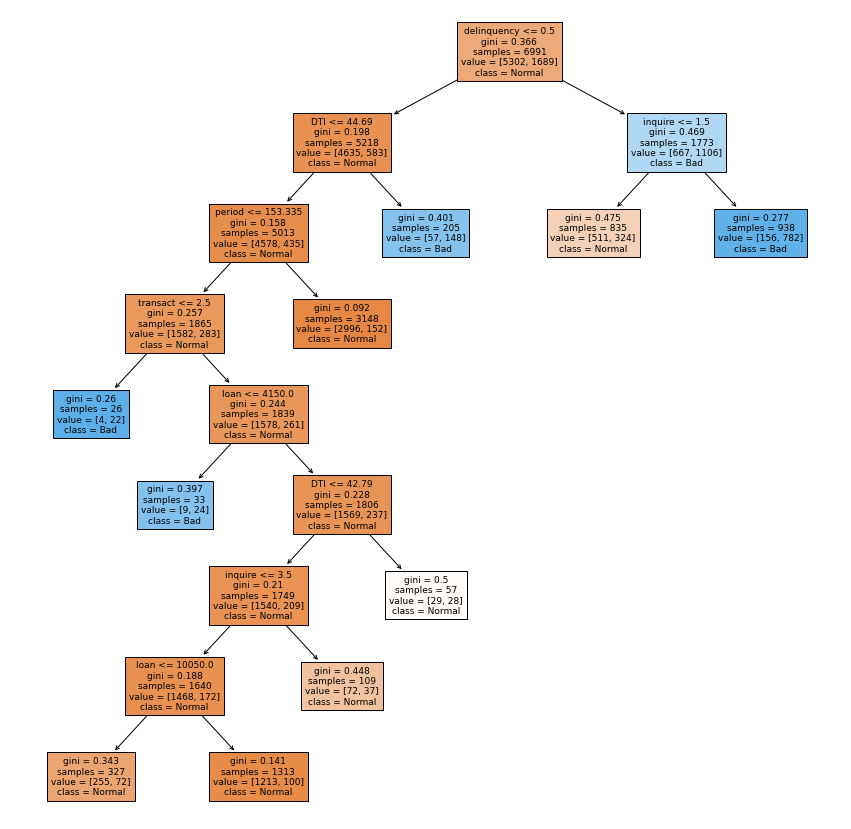

In [39]:
c_tree = DecisionTreeClassifier(ccp_alpha=0.0,min_impurity_decrease=0.001,min_samples_split=1000,random_state=0) 
c_tree.fit(X, y)
plt.figure(figsize=(15,15))
plot_tree(c_tree, feature_names=xname, class_names=yname, filled=True, fontsize=9) 
plt.show()

홀드아웃방법

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0, stratify=y)

In [43]:
np.random.seed(0)
g_cv = GridSearchCV(DecisionTreeClassifier(random_state=0),
              param_grid={'ccp_alpha': np.arange(0.000, 0.002, 0.0001),
                          'min_impurity_decrease': np.arange(0,0.003,0.0005),
                          'min_samples_split': np.arange(2,402,100)},
                    cv=10, n_jobs=-1)
g_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'ccp_alpha': array([0.    , 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007,
       0.0008, 0.0009, 0.001 , 0.0011, 0.0012, 0.0013, 0.0014, 0.0015,
       0.0016, 0.0017, 0.0018, 0.0019]),
                         'min_impurity_decrease': array([0.    , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025]),
                         'min_samples_split': array([  2, 102, 202, 302])})

In [44]:
print('selected:',g_cv.best_params_)
print('score   :',g_cv.best_score_)

selected: {'ccp_alpha': 0.0, 'min_impurity_decrease': 0.0005, 'min_samples_split': 2}
score   : 0.8960410273894761


In [45]:
c2_tree = DecisionTreeClassifier(ccp_alpha=0.0,min_impurity_decrease=0.0005,min_samples_split=2,random_state=0)
c2_tree.fit(X_train, y_train)

DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=0)

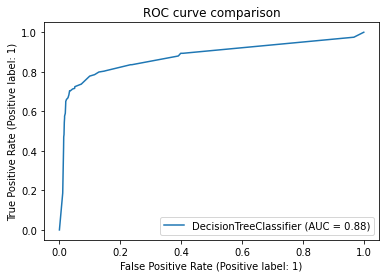

In [50]:
from sklearn.metrics import plot_roc_curve
roc_tree=plot_roc_curve(c2_tree, X_test, y_test)
plt.title("ROC curve comparison")
plt.show()

## 의사결정회귀나무

In [51]:
df=pd.read_csv('copdcat.csv' ,header=0)
X=df.drop(["CATScore"],axis=1)
y=df["CATScore"]

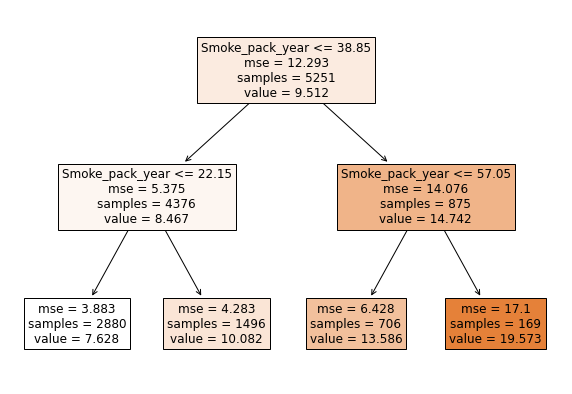

In [61]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
r_tree = DecisionTreeRegressor(max_depth=2,random_state=0) 
r_tree.fit(X, y)
plt.figure(figsize=(10,7))
plot_tree(r_tree, feature_names=X.columns, filled=True, fontsize=12) 
plt.show()

하이퍼파라미터

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [56]:
np.random.seed(0)
g_cv = GridSearchCV(DecisionTreeRegressor(random_state=0),
              param_grid={'ccp_alpha': np.arange(0.000, 0.01, 0.001),
                          'min_impurity_decrease': np.arange(0,0.01,0.001),
                          'min_samples_split': np.arange(2,402,100)},
                    cv=10, n_jobs=-1)
g_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=0), n_jobs=-1,
             param_grid={'ccp_alpha': array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009]),
                         'min_impurity_decrease': array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009]),
                         'min_samples_split': array([  2, 102, 202, 302])})

In [57]:
print('selected:',g_cv.best_params_)
print('score   :',g_cv.best_score_)

selected: {'ccp_alpha': 0.0, 'min_impurity_decrease': 0.007, 'min_samples_split': 2}
score   : 0.7821991304485522


In [63]:
r1_tree = DecisionTreeRegressor(ccp_alpha=0.0,min_impurity_decrease=0.007,min_samples_split=2,random_state=0)
r1_tree.fit(X_train, y_train)

DecisionTreeRegressor(min_impurity_decrease=0.007, random_state=0)

디폴트

In [62]:
r2_tree = DecisionTreeRegressor(random_state=0) 
r2_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

### 평균절대오차비율 (MAPE) 비교

In [64]:
from sklearn.metrics import mean_absolute_percentage_error
print('Pruned Tree      :',mean_absolute_percentage_error(y_test,r1_tree.predict(X_test)))
print('Default Tree     :',mean_absolute_percentage_error(y_test,r2_tree.predict(X_test)))

Pruned Tree      : 0.14905667093289068
Default Tree     : 0.18306681999302996


## 오분류표

In [73]:
df = pd.read_csv('loan.csv')
df['job'] = df['job'].replace({'Office':0, 'ProfExe':1, 'Other':2, 'Mgr':3, 'Self':4, 'Sales':5})
X = df.drop(['y'], axis=1)
y = df['y']
xname = X.columns
yname = ['Normal','Bad']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0, stratify=y)

In [74]:
#로지스틱회귀분석
from sklearn.linear_model import LogisticRegression
m1 = LogisticRegression(random_state=0, max_iter = 1000)
m1.fit(X_train, y_train)
m1_prob = m1.predict_proba(X_test)
pd.DataFrame(m1_prob)

,0,1
0,0.797334,0.202666
1,0.772756,0.227244
2,0.765714,0.234286
3,0.756511,0.243489
4,0.642193,0.357807
...,...,...
2792,0.551095,0.448905
2793,0.740449,0.259551
2794,0.485864,0.514136
2795,0.413873,0.586127


In [75]:
threshold = 0.1
m1_pred = (m1_prob[:,1]>threshold).astype(int)
m1_pred

array([1, 1, 1, ..., 1, 1, 1])

In [76]:
from sklearn.metrics import confusion_matrix
m1_cm = confusion_matrix(y_test, m1_pred)
pd.DataFrame(m1_cm)

,0,1
0,426,1695
1,45,631


In [78]:
# 정확도
accu1 = np.trace(m1_cm)/len(y_test)
print('정확도    :', np.round(accu1,2))

# 특이도, 민감도
spec1, sens1 = np.diag(m1_cm) / np.sum(m1_cm, axis = 1)
print('특이도    :', np.round(spec1,2))
print('민감도    :', np.round(sens1,2))

# 정밀도
prec1 = m1_cm[1,1] / np.sum(m1_cm, axis=0)[1]
print('정밀도    :', np.round(prec1,2))

# F1-score
f1_1 = 2*prec1*sens1 / (prec1+sens1)
print('F1-score :', np.round(f1_1,2))

정확도    : 0.38
특이도    : 0.2
민감도    : 0.93
정밀도    : 0.27
F1-score : 0.42


## roc

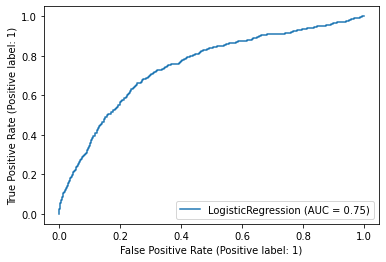

In [79]:
from sklearn.metrics import plot_roc_curve
m1_roc=plot_roc_curve(m1, X_test, y_test)

In [83]:
m2 = DecisionTreeClassifier(ccp_alpha=0.0,min_impurity_decrease=0.0005,min_samples_split=2,random_state=0)
m2.fit(X_train, y_train)

DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=0)

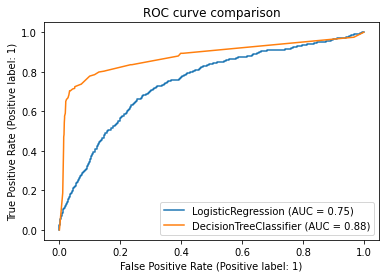

In [84]:
m1_roc=plot_roc_curve(m1, X_test, y_test)
plot_roc_curve(m2, X_test, y_test, ax = m1_roc.ax_)
plt.title("ROC curve comparison")
plt.show()

In [85]:
#신경망
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
c_nn = MLPClassifier(hidden_layer_sizes=(5),random_state=0, max_iter = 1000)
c_nn.fit(X_train_scaled, y_train)

#svm
from sklearn import svm
c_svm = svm.SVC(kernel='rbf', random_state=0)
c_svm.fit(X_train_scaled,y_train)

#랜덤포레스트
from sklearn.ensemble import RandomForestClassifier
c_rf = RandomForestClassifier(random_state=0)
c_rf.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

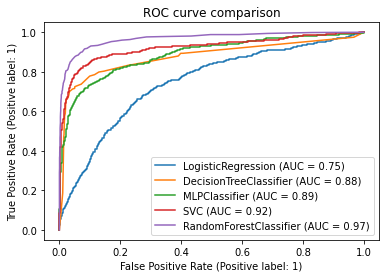

In [86]:
m1_roc=plot_roc_curve(m1, X_test, y_test)
plot_roc_curve(m2, X_test, y_test, ax = m1_roc.ax_)
plot_roc_curve(c_nn, X_test_scaled, y_test, ax = m1_roc.ax_)
plot_roc_curve(c_svm, X_test_scaled, y_test, ax = m1_roc.ax_)
plot_roc_curve(c_rf, X_test, y_test, ax = m1_roc.ax_)
plt.title("ROC curve comparison")
plt.show()

## 회귀모형 비교

In [87]:
df=pd.read_csv('copdcat.csv' ,header=0)
X=df.drop(["CATScore"],axis=1)
y=df["CATScore"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [89]:
from sklearn.linear_model import LinearRegression
r_linear = LinearRegression(fit_intercept = True)
r_linear.fit(X_train ,y_train)
linear_pred= r_linear.predict(X_test)

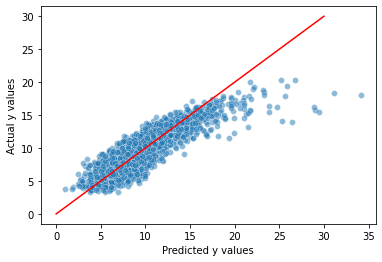

In [90]:
sns.scatterplot(y=linear_pred, x=y_test, alpha=0.5)
plt.plot([0, 30], [0, 30], color='red')
plt.xlabel("Predicted y values")
plt.ylabel("Actual y values")
plt.show()

In [91]:
from sklearn.tree import DecisionTreeRegressor
r_tree = DecisionTreeRegressor(ccp_alpha=0.0,min_impurity_decrease=0.007,min_samples_split=2,random_state=0)
r_tree.fit(X_train, y_train)
tree_pred= r_tree.predict(X_test)

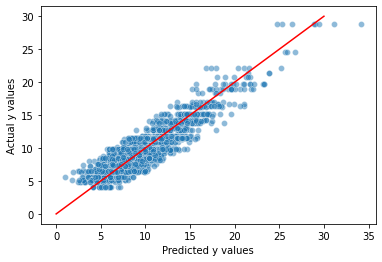

In [92]:
sns.scatterplot(y=tree_pred, x=y_test, alpha=0.5)
plt.plot([0, 30], [0, 30], color='red')
plt.xlabel("Predicted y values")
plt.ylabel("Actual y values")
plt.show()

In [94]:
from sklearn.metrics import r2_score
print('linear regression :',np.round(r2_score(y_test, linear_pred),3))
print('regression tree :',np.round(r2_score(y_test, tree_pred),3))

linear regression : 0.74
regression tree : 0.817


In [95]:
from sklearn.metrics import mean_absolute_error
print('linear regression :',np.round(mean_absolute_error(y_test, linear_pred),3))
print('regression tree :',np.round(mean_absolute_error(y_test, tree_pred),3))

linear regression : 1.321
regression tree : 1.217


In [96]:
from sklearn.metrics import mean_absolute_percentage_error
print('linear regression :',np.round(mean_absolute_percentage_error(y_test, linear_pred),3))
print('regression tree :',np.round(mean_absolute_percentage_error(y_test, tree_pred),3))

linear regression : 0.154
regression tree : 0.149


In [97]:
from sklearn.metrics import mean_squared_error
print('linear regression :',np.round(mean_squared_error(y_test, linear_pred),3))
print('regression tree :',np.round(mean_squared_error(y_test, tree_pred),3))

linear regression : 3.251
regression tree : 2.298
